Epoch 1/15
108360/108360 [==============================] - 148s 1ms/step - loss: 0.9159 - mse: 0.9159 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 2/15
108360/108360 [==============================] - 150s 1ms/step - loss: 0.7781 - mse: 0.7781 - val_loss: 0.7747 - val_mse: 0.7747
Epoch 3/15
108360/108360 [==============================] - 212s 2ms/step - loss: 0.7484 - mse: 0.7484 - val_loss: 0.7663 - val_mse: 0.7663
Epoch 4/15
108360/108360 [==============================] - 200s 2ms/step - loss: 0.7298 - mse: 0.7298 - val_loss: 0.7660 - val_mse: 0.7660
Epoch 5/15
108360/108360 [==============================] - 170s 2ms/step - loss: 0.7073 - mse: 0.7073 - val_loss: 0.7477 - val_mse: 0.7477
Epoch 6/15
108360/108360 [==============================] - 161s 1ms/step - loss: 0.6876 - mse: 0.6876 - val_loss: 0.7497 - val_mse: 0.7497
Epoch 7/15
108360/108360 [==============================] - 168s 2ms/step - loss: 0.6731 - mse: 0.6731 - val_loss: 0.7794 - val_mse: 0.7794
Epoch 8/15
108360/10

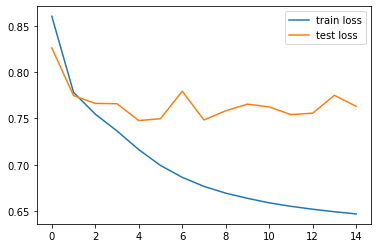

KeyError: 'mean_squared_error'

In [5]:
from __future__ import print_function, division
from builtins import range, input

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

# load in the data
df = pd.read_csv('./cleaned_nf_dataset.csv')

N = df.Cust_Id.max() + 1 # number of users
M = df.Movie_Id.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.Rating.mean()
epochs = 15
# reg = 0.0001 # regularization penalty


# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# the neural network
x = Dense(400)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(100)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.Cust_Id.values, df_train.Movie_Id.values],
  y=df_train.Rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.Cust_Id.values, df_test.Movie_Id.values],
    df_test.Rating.values - mu
  )
)

# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

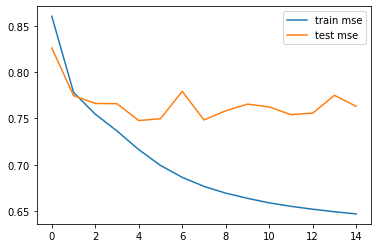

In [9]:
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [17]:
import numpy as np 
np.sqrt(.6349)

0.7968061244744545